In [12]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import hvplot.pandas
import hvplot.xarray
#import cartopy.crs as ccrs
#import geoviews as gv
#import pyproj
#import requests


import scipy.stats as st

from scipy.stats import linregress
import seaborn as sns



# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Import API key
#from api_keys import geoapify_key

crime_data_to_loadJan = "2022-01-west-midlands-street.csv"

crime_dataJan = pd.read_csv(crime_data_to_loadJan)

crime_dataJan.head()


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
1,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
2,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified,NaN
3,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified,NaN
4,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN


In [13]:
crime_dataJan.drop("Context",inplace=True,axis=1)
crime_dataJan

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN
1,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN
2,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
3,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
4,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...,...
31278,d61405c4eeec405f5225f43fe46a76e9fcae08f22ef921...,2022-01,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31279,a85fd2a46eff1ad76a18d55fcd7a20d7ffee9604a84181...,2022-01,West Midlands Police,West Midlands Police,-2.118459,52.585093,On or near Middle Cross,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31280,37239ad0977b4480e950e8e73e1a156f99e8316568b029...,2022-01,West Midlands Police,West Midlands Police,-2.120714,52.583904,On or near Pedestrian Subway,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31281,d9c1ca790e1223e000bc0fb552c5eea2297427ca9961f9...,2022-01,West Midlands Police,West Midlands Police,-2.121588,52.579894,On or near Vicarage Road,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified


In [14]:
crime_dataJan.drop("Crime ID",inplace=True,axis=1)
crime_dataJan

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN
1,2022-01,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN
2,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
3,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
4,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...
31278,2022-01,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31279,2022-01,West Midlands Police,West Midlands Police,-2.118459,52.585093,On or near Middle Cross,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31280,2022-01,West Midlands Police,West Midlands Police,-2.120714,52.583904,On or near Pedestrian Subway,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31281,2022-01,West Midlands Police,West Midlands Police,-2.121588,52.579894,On or near Vicarage Road,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified


In [15]:

crime_dataJan.drop("Last outcome category",inplace=True,axis=1)
crime_dataJan

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour
1,2022-01,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour
2,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences
3,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences
4,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences
...,...,...,...,...,...,...,...,...,...
31278,2022-01,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton,Violence and sexual offences
31279,2022-01,West Midlands Police,West Midlands Police,-2.118459,52.585093,On or near Middle Cross,E01010530,Wolverhampton,Violence and sexual offences
31280,2022-01,West Midlands Police,West Midlands Police,-2.120714,52.583904,On or near Pedestrian Subway,E01010530,Wolverhampton,Violence and sexual offences
31281,2022-01,West Midlands Police,West Midlands Police,-2.121588,52.579894,On or near Vicarage Road,E01010530,Wolverhampton,Violence and sexual offences


In [5]:
crime_dataJan.isna().sum()

Month                    0.0
Reported by              0.0
Falls within             0.0
Longitude                0.0
Latitude                 0.0
Location                 0.0
LSOA code                0.0
LSOA name                0.0
Crime type               0.0
Last outcome category    0.0
dtype: float64

In [16]:
crime_dataJan = crime_dataJan.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_dataJan = crime_dataJan[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code",]]
#new_crime_data = new_crime_data.set_index("City Name")
new_crime_dataJan.head()

,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code
0,Birmingham,2022-01,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417
1,Birmingham,2022-01,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417
2,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417
3,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417
4,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417


In [17]:
new_crime_data_bhamJan = new_crime_dataJan.loc[(new_crime_dataJan["City Name"]=="Birmingham")]
new_crime_data_covJan = new_crime_dataJan.loc[(new_crime_dataJan["City Name"]=="Coventry")]
new_crime_data_SandJan = new_crime_dataJan.loc[(new_crime_dataJan["City Name"]=="Sandwell")]
new_crime_data_whamJan = new_crime_dataJan.loc[(new_crime_dataJan["City Name"]=="Wolverhampton")]

In [18]:
BirJan=new_crime_data_bhamJan["City Name"].value_counts()
BirJan

Birmingham    13791
Name: City Name, dtype: int64

In [19]:
CovJan=new_crime_data_covJan["City Name"].value_counts()
CovJan

Coventry    3453
Name: City Name, dtype: int64

In [20]:
SandJan=new_crime_data_SandJan["City Name"].value_counts()
SandJan

Sandwell    3433
Name: City Name, dtype: int64

In [21]:
whamJan=new_crime_data_whamJan["City Name"].value_counts()
whamJan

Wolverhampton    2994
Name: City Name, dtype: int64

In [22]:
cities = ["Birmingham",  "Coventy","Sandwell", "Wolverhampton"]

colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0, 0.05, 0, 0)

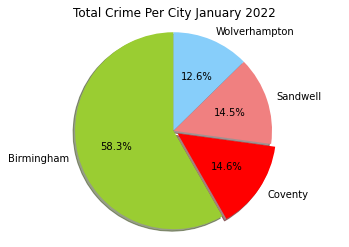

In [234]:
plt.title("Total Crime Per City January 2022")

no_crimes = [13791, 3453, 3433, 2994]

plt.pie(no_crimes, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

JB=no_crimes[0]
JC=no_crimes[1]
JS=no_crimes[2]
JW=no_crimes[3]

In [101]:
crime_data_to_loadFeb = "2022-02-west-midlands-street.csv"

crime_dataFeb = pd.read_csv(crime_data_to_loadFeb)

crime_dataFeb.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,39a636757dc35f1f582a0a2db4b9e2bf213bc8e9c14103...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Public order,Unable to prosecute suspect,NaN
1,b3279305e91cfa6a780ec08dc4fc0719f184356d908767...,2022-02,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified,NaN
2,271dfdd024fc4cce247b592736abac733639c880d5030a...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN
3,051261767b452c7b48cd5a722ab33d5f6967a017cf637e...,2022-02,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN
4,f3af5167aeff2c10c23b8c113801767037c05149e95862...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN


In [102]:
crime_dataFeb.drop("Context",inplace=True,axis=1)
crime_dataFeb

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,39a636757dc35f1f582a0a2db4b9e2bf213bc8e9c14103...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Public order,Unable to prosecute suspect
1,b3279305e91cfa6a780ec08dc4fc0719f184356d908767...,2022-02,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified
2,271dfdd024fc4cce247b592736abac733639c880d5030a...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
3,051261767b452c7b48cd5a722ab33d5f6967a017cf637e...,2022-02,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
4,f3af5167aeff2c10c23b8c113801767037c05149e95862...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...,...
29792,ebc9e3f0c752ce9839f4cf1b255d34b4b4556974e7e1af...,2022-02,West Midlands Police,West Midlands Police,-2.119642,52.580480,On or near Sutherland Place,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29793,4d038eb222e49308d42f3ffbffb5069bae748b7d43af95...,2022-02,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29794,b55d94bd9d49da712b1bc7bd8dfa4ef5ab472426874d9d...,2022-02,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29795,738ec57f6c7f5f66d30fdecbc350c1e8f09f53aa1e89e9...,2022-02,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect


In [103]:
crime_dataFeb.drop("Crime ID",inplace=True,axis=1)
crime_dataFeb

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Public order,Unable to prosecute suspect
1,2022-02,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified
2,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
3,2022-02,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
4,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...
29792,2022-02,West Midlands Police,West Midlands Police,-2.119642,52.580480,On or near Sutherland Place,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29793,2022-02,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29794,2022-02,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29795,2022-02,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect


In [104]:
crime_dataFeb.drop("Falls within",inplace=True,axis=1)
crime_dataFeb

,Month,Reported by,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2022-02,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Public order,Unable to prosecute suspect
1,2022-02,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified
2,2022-02,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
3,2022-02,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
4,2022-02,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...
29792,2022-02,West Midlands Police,-2.119642,52.580480,On or near Sutherland Place,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29793,2022-02,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29794,2022-02,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29795,2022-02,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect


In [105]:
crime_dataFeb.drop("LSOA code",inplace=True,axis=1)
crime_dataFeb

,Month,Reported by,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category
0,2022-02,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,Birmingham,Public order,Unable to prosecute suspect
1,2022-02,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,Birmingham,Vehicle crime,Investigation complete; no suspect identified
2,2022-02,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,Birmingham,Violence and sexual offences,Unable to prosecute suspect
3,2022-02,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,Birmingham,Violence and sexual offences,Unable to prosecute suspect
4,2022-02,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...
29792,2022-02,West Midlands Police,-2.119642,52.580480,On or near Sutherland Place,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29793,2022-02,West Midlands Police,-2.119653,52.578988,On or near Granville Street,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29794,2022-02,West Midlands Police,-2.119653,52.578988,On or near Granville Street,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29795,2022-02,West Midlands Police,-2.120244,52.579230,On or near Granville Close,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect


In [106]:
crime_dataFeb.drop("Reported by",inplace=True,axis=1)
crime_dataFeb

,Month,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category
0,2022-02,-1.850056,52.591108,On or near Walsall Road,Birmingham,Public order,Unable to prosecute suspect
1,2022-02,-1.851038,52.593177,On or near Longdon Drive,Birmingham,Vehicle crime,Investigation complete; no suspect identified
2,2022-02,-1.850056,52.591108,On or near Walsall Road,Birmingham,Violence and sexual offences,Unable to prosecute suspect
3,2022-02,-1.851038,52.593177,On or near Longdon Drive,Birmingham,Violence and sexual offences,Unable to prosecute suspect
4,2022-02,-1.850056,52.591108,On or near Walsall Road,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...
29792,2022-02,-2.119642,52.580480,On or near Sutherland Place,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29793,2022-02,-2.119653,52.578988,On or near Granville Street,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29794,2022-02,-2.119653,52.578988,On or near Granville Street,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29795,2022-02,-2.120244,52.579230,On or near Granville Close,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect


In [87]:
crime_dataFeb.isna().sum()

Month                    0
Reported by              0
Falls within             0
Longitude                0
Latitude                 0
Location                 0
LSOA code                0
City Name                0
Crime type               0
Last outcome category    0
dtype: int64

In [107]:
crime_dataFeb = crime_dataFeb.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_dataFeb = crime_dataFeb[["City Name", "Month", "Crime type" , "Longitude", "Latitude", "Location", "Last outcome category",]]
#new_crime_data = new_crime_data.set_index("City Name")
new_crime_dataFeb.head()

,City Name,Month,Crime type,Longitude,Latitude,Location,Last outcome category
0,Birmingham,2022-02,Public order,-1.850056,52.591108,On or near Walsall Road,Unable to prosecute suspect
1,Birmingham,2022-02,Vehicle crime,-1.851038,52.593177,On or near Longdon Drive,Investigation complete; no suspect identified
2,Birmingham,2022-02,Violence and sexual offences,-1.850056,52.591108,On or near Walsall Road,Unable to prosecute suspect
3,Birmingham,2022-02,Violence and sexual offences,-1.851038,52.593177,On or near Longdon Drive,Unable to prosecute suspect
4,Birmingham,2022-02,Violence and sexual offences,-1.850056,52.591108,On or near Walsall Road,Unable to prosecute suspect


In [111]:
bhamFeb = new_crime_dataFeb.loc[(new_crime_dataFeb["City Name"]=="Birmingham")]
covFeb = new_crime_dataFeb.loc[(new_crime_dataFeb["City Name"]=="Coventry")]
SandFeb = new_crime_dataFeb.loc[(new_crime_dataFeb["City Name"]=="Sandwell")]
whamFeb = new_crime_dataFeb.loc[(new_crime_dataFeb["City Name"]=="Wolverhampton")]

In [109]:
BirFeb=bhamFeb["City Name"].value_counts()
BirFeb

Birmingham    12995
Name: City Name, dtype: int64

In [ ]:
#For sum reason cannot getthrest of figures for Coventry, Sandwell and Wolverhamton so
#benneth in code done it another way

In [114]:

#CovFeb=covFeb["Crime"].value_counts()
CovFeb

Series([], Name: City Name, dtype: int64)

In [53]:
SandwFeb=SandFeb["City Name"].value_counts()
SandwFeb

Series([], Name: City Name, dtype: int64)

In [56]:
crime_data_to_loadMar = "2022-03-west-midlands-street.csv"

crime_dataMar = pd.read_csv(crime_data_to_loadMar)

crime_dataMar.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
1,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
2,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
3,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
4,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN,NaN


In [57]:
crime_dataMar.drop("Context",inplace=True,axis=1)
crime_dataMar

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN
1,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN
2,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN
3,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN
4,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32592,922814782d0311a7efc73b17d0a157f93b18abd5d0ce12...,2022-03,West Midlands Police,West Midlands Police,-2.122071,52.583436,On or near Pedestrian Subway,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
32593,e802204f80ee3979fb64f15dfeb4ecf1d3d6d355dad2c3...,2022-03,West Midlands Police,West Midlands Police,-2.119856,52.583267,On or near Parking Area,E01010530,Wolverhampton,Violence and sexual offences,Action to be taken by another organisation
32594,64427ac2bead0f16919f6a8e40c55d5297697497b0de06...,2022-03,West Midlands Police,West Midlands Police,-2.119856,52.583267,On or near Parking Area,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
32595,3ec3eb89e72f51e3f35eab4f19fc913d50ea94a834866a...,2022-03,West Midlands Police,West Midlands Police,-2.120714,52.583904,On or near Pedestrian Subway,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect


In [58]:
crime_dataMar.drop("Last outcome category",inplace=True,axis=1)
crime_dataMar

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour
1,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour
2,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour
3,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour
4,NaN,2022-03,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour
...,...,...,...,...,...,...,...,...,...,...
32592,922814782d0311a7efc73b17d0a157f93b18abd5d0ce12...,2022-03,West Midlands Police,West Midlands Police,-2.122071,52.583436,On or near Pedestrian Subway,E01010530,Wolverhampton,Violence and sexual offences
32593,e802204f80ee3979fb64f15dfeb4ecf1d3d6d355dad2c3...,2022-03,West Midlands Police,West Midlands Police,-2.119856,52.583267,On or near Parking Area,E01010530,Wolverhampton,Violence and sexual offences
32594,64427ac2bead0f16919f6a8e40c55d5297697497b0de06...,2022-03,West Midlands Police,West Midlands Police,-2.119856,52.583267,On or near Parking Area,E01010530,Wolverhampton,Violence and sexual offences
32595,3ec3eb89e72f51e3f35eab4f19fc913d50ea94a834866a...,2022-03,West Midlands Police,West Midlands Police,-2.120714,52.583904,On or near Pedestrian Subway,E01010530,Wolverhampton,Violence and sexual offences


In [59]:
crime_dataMar.drop("Crime ID",inplace=True,axis=1)
crime_dataMar

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2022-03,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour
1,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour
2,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour
3,2022-03,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour
4,2022-03,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour
...,...,...,...,...,...,...,...,...,...
32592,2022-03,West Midlands Police,West Midlands Police,-2.122071,52.583436,On or near Pedestrian Subway,E01010530,Wolverhampton,Violence and sexual offences
32593,2022-03,West Midlands Police,West Midlands Police,-2.119856,52.583267,On or near Parking Area,E01010530,Wolverhampton,Violence and sexual offences
32594,2022-03,West Midlands Police,West Midlands Police,-2.119856,52.583267,On or near Parking Area,E01010530,Wolverhampton,Violence and sexual offences
32595,2022-03,West Midlands Police,West Midlands Police,-2.120714,52.583904,On or near Pedestrian Subway,E01010530,Wolverhampton,Violence and sexual offences


In [60]:
crime_dataMar.isna().sum()

Month           0
Reported by     0
Falls within    0
Longitude       0
Latitude        0
Location        0
LSOA code       0
LSOA name       0
Crime type      0
dtype: int64

In [64]:
crime_dataMar = crime_dataMar.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_dataMar = crime_dataMar[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code",]]
#new_crime_data = new_crime_data.set_index("City Name")
new_crime_dataMar.head()

,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code
0,Birmingham,2022-03,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417
1,Birmingham,2022-03,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417
2,Birmingham,2022-03,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417
3,Birmingham,2022-03,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417
4,Birmingham,2022-03,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417


In [68]:
bhamMar = new_crime_dataMar.loc[(new_crime_dataMar["City Name"]=="Birmingham")]
covMar = new_crime_dataMar.loc[(new_crime_dataMar["City Name"]=="Coventry")]
SandMar = new_crime_dataMar.loc[(new_crime_dataMar["City Name"]=="Sandwell")]
whamMar = new_crime_dataMar.loc[(new_crime_dataMar["City Name"]=="Wolverhampton")]

In [71]:
BhamMar=bhamMar["City Name"].value_counts()
BhamMar

Birmingham    14352
Name: City Name, dtype: int64

In [72]:
CovMar=covMar["City Name"].value_counts()
CovMar

Coventry    3701
Name: City Name, dtype: int64

In [73]:
SanMar=SandMar["City Name"].value_counts()
SanMar

Sandwell    3649
Name: City Name, dtype: int64

In [70]:
WhamMar=whamMar["City Name"].value_counts()
WhamMar

Wolverhampton    3139
Name: City Name, dtype: int64

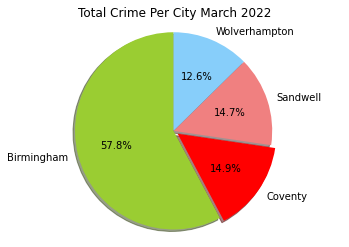

In [235]:
plt.title("Total Crime Per City March 2022")

no_crimes = [14352, 3701, 3649, 3139]

plt.pie(no_crimes, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

MB=no_crimes [0]
MC=no_crimes [1]
MS=no_crimes [2]
MW=no_crimes [3]

In [75]:
crime_data_to_loadApr = "2022-04-west-midlands-street.csv"

crime_dataApr = pd.read_csv(crime_data_to_loadApr)

crime_dataApr.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,19e76809c214b2713baa5eafdf0e202a88032caaf08719...,2022-04,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Other theft,Investigation complete; no suspect identified,NaN
1,b2ab536372af98a6675f293366a46a63526f2e831f696e...,2022-04,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified,NaN
2,324eb02817b82f9f841337c44a50223ad17e43b5b18b3c...,2022-04,West Midlands Police,West Midlands Police,-1.843740,52.594588,On or near Clarence Road,E01009418,Birmingham,Burglary,Investigation complete; no suspect identified,NaN
3,b684674910a1324283b0d202c3887776cc558308579f64...,2022-04,West Midlands Police,West Midlands Police,-1.839661,52.595958,On or near Wall Drive,E01009418,Birmingham,Criminal damage and arson,Investigation complete; no suspect identified,NaN
4,d14791279b33d9647e7f5997c5f1e226a040d3777a13df...,2022-04,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham,Criminal damage and arson,Unable to prosecute suspect,NaN


In [76]:
crime_dataApr.drop("Context",inplace=True,axis=1)
crime_dataApr

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,19e76809c214b2713baa5eafdf0e202a88032caaf08719...,2022-04,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Other theft,Investigation complete; no suspect identified
1,b2ab536372af98a6675f293366a46a63526f2e831f696e...,2022-04,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
2,324eb02817b82f9f841337c44a50223ad17e43b5b18b3c...,2022-04,West Midlands Police,West Midlands Police,-1.843740,52.594588,On or near Clarence Road,E01009418,Birmingham,Burglary,Investigation complete; no suspect identified
3,b684674910a1324283b0d202c3887776cc558308579f64...,2022-04,West Midlands Police,West Midlands Police,-1.839661,52.595958,On or near Wall Drive,E01009418,Birmingham,Criminal damage and arson,Investigation complete; no suspect identified
4,d14791279b33d9647e7f5997c5f1e226a040d3777a13df...,2022-04,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham,Criminal damage and arson,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...,...
31838,15f2e7259c6e606216192e66bbfc1da7b49dbb696111e6...,2022-04,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
31839,1435f483b16672b666d8185271a2a7bf81dbe49e28f354...,2022-04,West Midlands Police,West Midlands Police,-2.124035,52.578714,On or near Howard Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31840,3d520a675028f0d5382dc27b232dd6bf95cda0b7796f64...,2022-04,West Midlands Police,West Midlands Police,-2.119856,52.583267,On or near Parking Area,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31841,5d103b55aa3e808e869a2f850b9cef7a19fb4bf889e488...,2022-04,West Midlands Police,West Midlands Police,-2.125874,52.581858,On or near Snow Hill,E01010530,Wolverhampton,Violence and sexual offences,Offender given a caution


In [77]:
crime_dataApr.isna().sum()

Crime ID                 1983
Month                       0
Reported by                 0
Falls within                0
Longitude                   0
Latitude                    0
Location                    0
LSOA code                   0
LSOA name                   0
Crime type                  0
Last outcome category    1983
dtype: int64

In [78]:
crime_dataApr = crime_dataApr.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_dataApr = crime_dataApr[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code","Last outcome category", "Crime ID"]]
#new_crime_data = new_crime_data.set_index("City Name")
new_crime_dataApr.head()

,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,Crime ID
0,Birmingham,2022-04,Other theft,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,19e76809c214b2713baa5eafdf0e202a88032caaf08719...
1,Birmingham,2022-04,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,b2ab536372af98a6675f293366a46a63526f2e831f696e...
2,Birmingham,2022-04,Burglary,West Midlands Police,West Midlands Police,-1.843740,52.594588,On or near Clarence Road,E01009418,Investigation complete; no suspect identified,324eb02817b82f9f841337c44a50223ad17e43b5b18b3c...
3,Birmingham,2022-04,Criminal damage and arson,West Midlands Police,West Midlands Police,-1.839661,52.595958,On or near Wall Drive,E01009418,Investigation complete; no suspect identified,b684674910a1324283b0d202c3887776cc558308579f64...
4,Birmingham,2022-04,Criminal damage and arson,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Unable to prosecute suspect,d14791279b33d9647e7f5997c5f1e226a040d3777a13df...


In [79]:
bhamApr = new_crime_dataApr.loc[(new_crime_dataApr["City Name"]=="Birmingham")]
covApr = new_crime_dataApr.loc[(new_crime_dataApr["City Name"]=="Coventry")]
SandApr = new_crime_dataApr.loc[(new_crime_dataApr["City Name"]=="Sandwell")]
whamApr = new_crime_dataApr.loc[(new_crime_dataApr["City Name"]=="Wolverhampton")]

In [81]:
BirApr=bhamApr["City Name"].value_counts()
BirApr

Birmingham    13840
Name: City Name, dtype: int64

In [82]:
CovApr=covApr["City Name"].value_counts()
CovApr

Coventry    3733
Name: City Name, dtype: int64

In [83]:
sandApr=SandApr["City Name"].value_counts()
sandApr

Sandwell    3465
Name: City Name, dtype: int64

In [84]:
WhamApr=whamApr["City Name"].value_counts()
WhamApr

Wolverhampton    3181
Name: City Name, dtype: int64

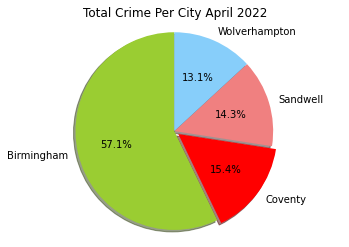

In [237]:
plt.title("Total Crime Per City April 2022")

no_crimes = [13840, 3733, 3465, 3181]

plt.pie(no_crimes, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

AB=no_crimes[0]
AC=no_crimes[1]
AS=no_crimes[2]
AW=no_crimes[3]

In [115]:
crime_data_to_loadMay = "2022-05-west-midlands-street.csv"

crime_dataMay = pd.read_csv(crime_data_to_loadMay)

crime_dataMay.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,5b261d3cc9b83aa150082b92cc7533af4bc2208f1087ce...,2022-05,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Other theft,Investigation complete; no suspect identified,NaN
1,b3fec0aff1aa3d6b591b0ae387aaf27fdab25c4b466fba...,2022-05,West Midlands Police,West Midlands Police,-1.851382,52.591757,On or near Walsall Road,E01009417,Birmingham,Public order,Investigation complete; no suspect identified,NaN
2,d574b2cfd85aca98349ad8c177dc17ba3833bc28250cf8...,2022-05,West Midlands Police,West Midlands Police,-1.849280,52.593346,On or near Russell Bank Road,E01009417,Birmingham,Violence and sexual offences,Action to be taken by another organisation,NaN
3,c4840844a9ee21f12804fbda768d4d89d03989279540b3...,2022-05,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN
4,8bd3fce99bbc2257ead7f53fdc8e054c52baacb6d55172...,2022-05,West Midlands Police,West Midlands Police,-1.849280,52.593346,On or near Russell Bank Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN


In [116]:
crime_dataMay.drop("Context",inplace=True,axis=1)
crime_dataMay

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,5b261d3cc9b83aa150082b92cc7533af4bc2208f1087ce...,2022-05,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Other theft,Investigation complete; no suspect identified
1,b3fec0aff1aa3d6b591b0ae387aaf27fdab25c4b466fba...,2022-05,West Midlands Police,West Midlands Police,-1.851382,52.591757,On or near Walsall Road,E01009417,Birmingham,Public order,Investigation complete; no suspect identified
2,d574b2cfd85aca98349ad8c177dc17ba3833bc28250cf8...,2022-05,West Midlands Police,West Midlands Police,-1.849280,52.593346,On or near Russell Bank Road,E01009417,Birmingham,Violence and sexual offences,Action to be taken by another organisation
3,c4840844a9ee21f12804fbda768d4d89d03989279540b3...,2022-05,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
4,8bd3fce99bbc2257ead7f53fdc8e054c52baacb6d55172...,2022-05,West Midlands Police,West Midlands Police,-1.849280,52.593346,On or near Russell Bank Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...,...
34100,e6a43e9c085b1700cdeb6f51eceae21508486ba333fff2...,2022-05,West Midlands Police,West Midlands Police,-2.117131,52.579575,On or near Steelhouse Lane,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
34101,77d8a351f1c82ac29c7f2ce595c1fb3255f1143816d589...,2022-05,West Midlands Police,West Midlands Police,-2.120034,52.577954,On or near All Saints Road,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
34102,ef4e12e9f090b3ddd753ab666a38395c0bf7bc149857a0...,2022-05,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
34103,7fa6e2aef4d4463c12d48cfcf28de3d2eeb2c5307fed58...,2022-05,West Midlands Police,West Midlands Police,-2.120286,52.578475,On or near Maxwell Road,E01010530,Wolverhampton,Other crime,Unable to prosecute suspect


In [118]:
crime_dataMay.isna().sum()

Crime ID                 1861
Month                       0
Reported by                 0
Falls within                0
Longitude                   0
Latitude                    0
Location                    0
LSOA code                   0
LSOA name                   0
Crime type                  0
Last outcome category    1861
dtype: int64

In [120]:
crime_dataMay = crime_dataMay.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_dataMay = crime_dataMay[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code","Last outcome category", "Crime ID"]]
#new_crime_data = new_crime_data.set_index("City Name")
new_crime_dataMay.head()


,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,Crime ID
0,Birmingham,2022-05,Other theft,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,5b261d3cc9b83aa150082b92cc7533af4bc2208f1087ce...
1,Birmingham,2022-05,Public order,West Midlands Police,West Midlands Police,-1.851382,52.591757,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,b3fec0aff1aa3d6b591b0ae387aaf27fdab25c4b466fba...
2,Birmingham,2022-05,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.849280,52.593346,On or near Russell Bank Road,E01009417,Action to be taken by another organisation,d574b2cfd85aca98349ad8c177dc17ba3833bc28250cf8...
3,Birmingham,2022-05,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Unable to prosecute suspect,c4840844a9ee21f12804fbda768d4d89d03989279540b3...
4,Birmingham,2022-05,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.849280,52.593346,On or near Russell Bank Road,E01009417,Unable to prosecute suspect,8bd3fce99bbc2257ead7f53fdc8e054c52baacb6d55172...


In [121]:
bhamMay = new_crime_dataMay.loc[(new_crime_dataMay["City Name"]=="Birmingham")]
covMay = new_crime_dataMay.loc[(new_crime_dataMay["City Name"]=="Coventry")]
SandMay = new_crime_dataMay.loc[(new_crime_dataMay["City Name"]=="Sandwell")]
whamMay = new_crime_dataMay.loc[(new_crime_dataMay["City Name"]=="Wolverhampton")]

In [122]:
BirMay=bhamMay["City Name"].value_counts()
BirMay

Birmingham    14900
Name: City Name, dtype: int64

In [123]:
CovMay=covMay["City Name"].value_counts()
CovMay

Coventry    4056
Name: City Name, dtype: int64

In [124]:
SanMay=SandMay["City Name"].value_counts()
SanMay

Sandwell    3839
Name: City Name, dtype: int64

In [125]:
WhamMay=whamMay["City Name"].value_counts()
WhamMay

Wolverhampton    3185
Name: City Name, dtype: int64

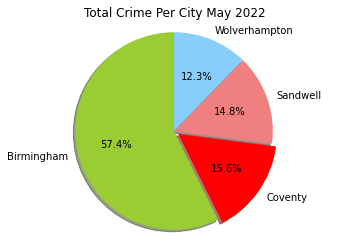

In [238]:
plt.title("Total Crime Per City May 2022")

no_crimes = [14900, 4056, 3839, 3185]

plt.pie(no_crimes, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

MaB=no_crimes[0]
MaC=no_crimes[1]
MaS=no_crimes[2]
MaW=no_crimes[3]

In [127]:
crime_data_to_loadJun = "2022-06-west-midlands-street.csv"

crime_dataJun = pd.read_csv(crime_data_to_loadJun)

crime_dataJun.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,27d4ece3526e7293d8a89afce2722bef128e7f20224a92...,2022-06,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified,NaN
1,1aacda1b9c86ea8f635843b5270cd83e18f12e4f4d40a5...,2022-06,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN
2,16d3f5c46bce530e79a32c79aeba3e4557b4b148108669...,2022-06,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Birmingham,Criminal damage and arson,Investigation complete; no suspect identified,NaN
3,38aa0d8629c711ab8c422ea9ec0c968d85392c320ccdfe...,2022-06,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham,Vehicle crime,Investigation complete; no suspect identified,NaN
4,e3903439b872b130930f1cc44c6098a4286719be392cc6...,2022-06,West Midlands Police,West Midlands Police,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham,Burglary,Investigation complete; no suspect identified,NaN


In [128]:
crime_dataJun.drop("Context",inplace=True,axis=1)
crime_dataJun

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,27d4ece3526e7293d8a89afce2722bef128e7f20224a92...,2022-06,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified
1,1aacda1b9c86ea8f635843b5270cd83e18f12e4f4d40a5...,2022-06,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
2,16d3f5c46bce530e79a32c79aeba3e4557b4b148108669...,2022-06,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Birmingham,Criminal damage and arson,Investigation complete; no suspect identified
3,38aa0d8629c711ab8c422ea9ec0c968d85392c320ccdfe...,2022-06,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham,Vehicle crime,Investigation complete; no suspect identified
4,e3903439b872b130930f1cc44c6098a4286719be392cc6...,2022-06,West Midlands Police,West Midlands Police,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham,Burglary,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...,...
33329,efb8d8725465a73a2ef2b7a34f2f43c2d20358ddf6d397...,2022-06,West Midlands Police,West Midlands Police,-2.121588,52.579894,On or near Vicarage Road,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
33330,8945c1a9905c3aa4646949893e70e020f5dd413f827ccb...,2022-06,West Midlands Police,West Midlands Police,-2.124530,52.581482,On or near Parking Area,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
33331,eb7d753fe1b06528d55a5d5d89312bcbc66f3c62a24a40...,2022-06,West Midlands Police,West Midlands Police,-2.116019,52.583334,On or near East Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
33332,56a83f75e48ac48ae17b467bd91a736fa8360bba545257...,2022-06,West Midlands Police,West Midlands Police,-2.119856,52.583267,On or near Parking Area,E01010530,Wolverhampton,Other crime,Unable to prosecute suspect


In [129]:
crime_dataJun.drop("Crime ID",inplace=True,axis=1)
crime_dataJun

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2022-06,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified
1,2022-06,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
2,2022-06,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Birmingham,Criminal damage and arson,Investigation complete; no suspect identified
3,2022-06,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham,Vehicle crime,Investigation complete; no suspect identified
4,2022-06,West Midlands Police,West Midlands Police,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham,Burglary,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...
33329,2022-06,West Midlands Police,West Midlands Police,-2.121588,52.579894,On or near Vicarage Road,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
33330,2022-06,West Midlands Police,West Midlands Police,-2.124530,52.581482,On or near Parking Area,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
33331,2022-06,West Midlands Police,West Midlands Police,-2.116019,52.583334,On or near East Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
33332,2022-06,West Midlands Police,West Midlands Police,-2.119856,52.583267,On or near Parking Area,E01010530,Wolverhampton,Other crime,Unable to prosecute suspect


In [130]:
crime_dataJun.isna().sum()

Month                       0
Reported by                 0
Falls within                0
Longitude                   0
Latitude                    0
Location                    0
LSOA code                   0
LSOA name                   0
Crime type                  0
Last outcome category    1885
dtype: int64

In [131]:
crime_dataJun = crime_dataJun.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_dataJun = crime_dataJun[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code","Last outcome category", ]]
#new_crime_data = new_crime_data.set_index("City Name")
new_crime_dataJun.head()


,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category
0,Birmingham,2022-06,Vehicle crime,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified
1,Birmingham,2022-06,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Unable to prosecute suspect
2,Birmingham,2022-06,Criminal damage and arson,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Investigation complete; no suspect identified
3,Birmingham,2022-06,Vehicle crime,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Investigation complete; no suspect identified
4,Birmingham,2022-06,Burglary,West Midlands Police,West Midlands Police,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Investigation complete; no suspect identified


In [132]:
bhamJun = new_crime_dataJun.loc[(new_crime_dataJun["City Name"]=="Birmingham")]
covJun = new_crime_dataJun.loc[(new_crime_dataJun["City Name"]=="Coventry")]
SandJun = new_crime_dataJun.loc[(new_crime_dataJun["City Name"]=="Sandwell")]
whamJun = new_crime_dataJun.loc[(new_crime_dataJun["City Name"]=="Wolverhampton")]

In [134]:
BirJun=bhamJun["City Name"].value_counts()
BirJun

Birmingham    15070
Name: City Name, dtype: int64

In [135]:
CovJun=covJun["City Name"].value_counts()
CovJun

Coventry    3838
Name: City Name, dtype: int64

In [136]:
SanJun=SandJun["City Name"].value_counts()
SanJun

Sandwell    3533
Name: City Name, dtype: int64

In [137]:
WhamJun=whamJun["City Name"].value_counts()
WhamJun

Wolverhampton    3220
Name: City Name, dtype: int64

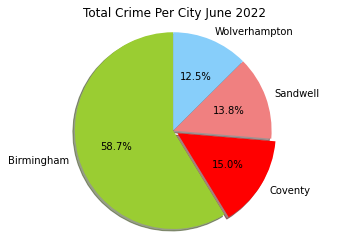

In [239]:
plt.title("Total Crime Per City June 2022")

no_crimes = [15070, 3838, 3533, 3220]

plt.pie(no_crimes, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

JunB=no_crimes[0]
JunC=no_crimes[1]
JunS=no_crimes[2]
JunW=no_crimes[3]

In [144]:
crime_data_to_loadJul = "2022-07-west-midlands-street.csv"

crime_dataJul = pd.read_csv(crime_data_to_loadJul)

crime_dataJul.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2022-07,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
1,f72dd6fff9e9bb947aa093d2b65a11e694a4c9fa48da52...,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Criminal damage and arson,Unable to prosecute suspect,NaN
2,11e3595cf6c7db2039f9d290eff0d475bb4943cd458648...,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Public order,Unable to prosecute suspect,NaN
3,a61d6928d5f12bf684443343b9d774ea8755d9fe152baa...,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.593204,On or near Longdon Drive,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified,NaN
4,e78b0d891c6bd02aeb4d2222abc917281276f1b77aa933...,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN


In [145]:
crime_dataJul.drop("Last outcome category",inplace=True,axis=1)
crime_dataJul

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Context
0,NaN,2022-07,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN
1,f72dd6fff9e9bb947aa093d2b65a11e694a4c9fa48da52...,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Criminal damage and arson,NaN
2,11e3595cf6c7db2039f9d290eff0d475bb4943cd458648...,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Public order,NaN
3,a61d6928d5f12bf684443343b9d774ea8755d9fe152baa...,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.593204,On or near Longdon Drive,E01009417,Birmingham,Vehicle crime,NaN
4,e78b0d891c6bd02aeb4d2222abc917281276f1b77aa933...,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Violence and sexual offences,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34577,8ea632cebac448e3aaa24516d8a03f41a63c216b949286...,2022-07,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,NaN
34578,8b9dc9557e5e96b2418d1739c9aa1b7a07e3fc527ca2f4...,2022-07,West Midlands Police,West Midlands Police,-2.119771,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,NaN
34579,18e205627d1efa240474dc31a145a6dc02d3ec056bf8a9...,2022-07,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,NaN
34580,0ac4e26f21c7a85b457012db2b16ff47bda5b24c341cf6...,2022-07,West Midlands Police,West Midlands Police,-2.118707,52.578665,On or near Adelaide Walk,E01010530,Wolverhampton,Violence and sexual offences,NaN


In [146]:
crime_dataJul.drop("Crime ID",inplace=True,axis=1)
crime_dataJul

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Context
0,2022-07,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN
1,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Criminal damage and arson,NaN
2,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Public order,NaN
3,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.593204,On or near Longdon Drive,E01009417,Birmingham,Vehicle crime,NaN
4,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Violence and sexual offences,NaN
...,...,...,...,...,...,...,...,...,...,...
34577,2022-07,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,NaN
34578,2022-07,West Midlands Police,West Midlands Police,-2.119771,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,NaN
34579,2022-07,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,NaN
34580,2022-07,West Midlands Police,West Midlands Police,-2.118707,52.578665,On or near Adelaide Walk,E01010530,Wolverhampton,Violence and sexual offences,NaN


In [147]:
crime_dataJul.drop("Context",inplace=True,axis=1)
crime_dataJul

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2022-07,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour
1,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Criminal damage and arson
2,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Public order
3,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.593204,On or near Longdon Drive,E01009417,Birmingham,Vehicle crime
4,2022-07,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Violence and sexual offences
...,...,...,...,...,...,...,...,...,...
34577,2022-07,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences
34578,2022-07,West Midlands Police,West Midlands Police,-2.119771,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences
34579,2022-07,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences
34580,2022-07,West Midlands Police,West Midlands Police,-2.118707,52.578665,On or near Adelaide Walk,E01010530,Wolverhampton,Violence and sexual offences


In [148]:
crime_dataJul.isna().sum()

Month           0
Reported by     0
Falls within    0
Longitude       0
Latitude        0
Location        0
LSOA code       0
LSOA name       0
Crime type      0
dtype: int64

In [157]:
crime_dataJul = crime_dataJul.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_dataJul = crime_dataJul[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code",]]
#new_crime_data = new_crime_data.set_index("City Name")
new_crime_dataJul.head()

,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code
0,Birmingham,2022-07,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417
1,Birmingham,2022-07,Criminal damage and arson,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417
2,Birmingham,2022-07,Public order,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417
3,Birmingham,2022-07,Vehicle crime,West Midlands Police,West Midlands Police,-1.851067,52.593204,On or near Longdon Drive,E01009417
4,Birmingham,2022-07,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417


In [266]:
bhamJul = new_crime_dataJul.loc[(new_crime_dataJul["City Name"]=="Birmingham")]
covJul = new_crime_dataJul.loc[(new_crime_dataJul["City Name"]=="Coventry")]
SandJul = new_crime_dataJul.loc[(new_crime_dataJul["City Name"]=="Sandwell")]
whamJul = new_crime_dataJul.loc[(new_crime_dataJul["City Name"]=="Wolverhampton")]

In [160]:

BirJul=bhamJul["City Name"].value_counts()
BirJul


Birmingham    15535
Name: City Name, dtype: int64

In [161]:
CovJul=covJul["City Name"].value_counts()
CovJul

Coventry    3923
Name: City Name, dtype: int64

In [162]:
sandJul=SandJul["City Name"].value_counts()
sandJul

Sandwell    3731
Name: City Name, dtype: int64

In [163]:
WhamJul=whamJul["City Name"].value_counts()
WhamJul

Wolverhampton    3298
Name: City Name, dtype: int64

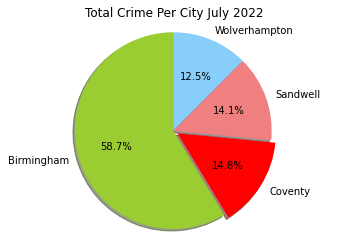

In [267]:
plt.title("Total Crime Per City July 2022")

no_crimes = [15535, 3923, 3731, 3298]

plt.pie(no_crimes, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


JulB=no_crimes[0]
JulC=no_crimes[1]
JulS=no_crimes[2]
JulW=no_crimes[3]




In [152]:
crime_data_to_loadAug = "2022-08-west-midlands-street.csv"

crime_dataAug = pd.read_csv(crime_data_to_loadAug)

crime_dataAug.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,7652899843ae62cd881283009dae60f06d65f053cc0b72...,2022-08,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Criminal damage and arson,Under investigation,NaN
1,ed1f5cd83469f040bb8ebb801974414e8e7464ffd0256c...,2022-08,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Criminal damage and arson,Investigation complete; no suspect identified,NaN
2,1600386de452547931fec608d2608dfb0237e390a8832b...,2022-08,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Public order,Under investigation,NaN
3,1fbc06ef3e9060da874894be8a23a70a5ffe794dc32ecd...,2022-08,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified,NaN
4,0c0ca634084f5f2ba089e359241ce38f248b865751280b...,2022-08,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN


In [165]:
crime_dataAug.drop("Context",inplace=True,axis=1)
crime_dataAug

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,7652899843ae62cd881283009dae60f06d65f053cc0b72...,2022-08,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Criminal damage and arson,Under investigation
1,ed1f5cd83469f040bb8ebb801974414e8e7464ffd0256c...,2022-08,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Criminal damage and arson,Investigation complete; no suspect identified
2,1600386de452547931fec608d2608dfb0237e390a8832b...,2022-08,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Public order,Under investigation
3,1fbc06ef3e9060da874894be8a23a70a5ffe794dc32ecd...,2022-08,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified
4,0c0ca634084f5f2ba089e359241ce38f248b865751280b...,2022-08,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...,...
33670,ef2f45e82bd622919fda2d27102a30cb702fe1015e3b2a...,2022-08,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
33671,df0d82f93dbc4afbd831351b98660ae538cf62e534b029...,2022-08,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
33672,a62434708016ce1e0a8fc18b4ddbc1e69bb86b759163ab...,2022-08,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
33673,ba0083135c631747ab02e268b43ebd4344d49e08141473...,2022-08,West Midlands Police,West Midlands Police,-2.125495,52.582736,On or near,E01010530,Wolverhampton,Violence and sexual offences,Under investigation


In [166]:
crime_dataAug = crime_dataAug.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_dataAug = crime_dataAug[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code",]]
#new_crime_data = new_crime_data.set_index("City Name")
new_crime_dataAug.head()


,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code
0,Birmingham,2022-08,Criminal damage and arson,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417
1,Birmingham,2022-08,Criminal damage and arson,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417
2,Birmingham,2022-08,Public order,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417
3,Birmingham,2022-08,Vehicle crime,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417
4,Birmingham,2022-08,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.851067,52.588979,On or near Crown Lane,E01009417


In [167]:
crime_dataAug.isna().sum()

Crime ID                 2030
Month                       0
Reported by                 0
Falls within                0
Longitude                   0
Latitude                    0
Location                    0
LSOA code                   0
City Name                   0
Crime type                  0
Last outcome category    2030
dtype: int64

In [169]:
bhamAug = new_crime_dataAug.loc[(new_crime_dataAug["City Name"]=="Birmingham")]
covAug = new_crime_dataAug.loc[(new_crime_dataAug["City Name"]=="Coventry")]
SandAug = new_crime_dataAug.loc[(new_crime_dataAug["City Name"]=="Sandwell")]
whamAug = new_crime_dataAug.loc[(new_crime_dataAug["City Name"]=="Wolverhampton")]

In [170]:
BirAug=bhamAug["City Name"].value_counts()
BirAug

Birmingham    15102
Name: City Name, dtype: int64

In [171]:
CovAug=covAug["City Name"].value_counts()
CovAug

Coventry    3925
Name: City Name, dtype: int64

In [172]:
SanAug=SandAug["City Name"].value_counts()
SanAug

Sandwell    3458
Name: City Name, dtype: int64

In [174]:
WhamAug=whamAug["City Name"].value_counts()
WhamAug

Wolverhampton    3301
Name: City Name, dtype: int64

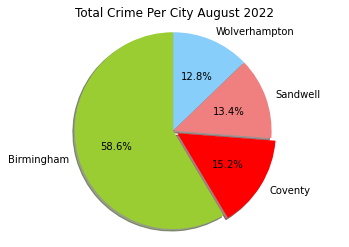

In [268]:
plt.title("Total Crime Per City August 2022")

no_crimes = [15102, 3925, 3458, 3301]

plt.pie(no_crimes, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


AugB=no_crimes[0]
AugC=no_crimes[1]
AugS=no_crimes[2]
AugW=no_crimes[3]

In [176]:
crime_data_to_loadSep = "2022-09-west-midlands-street.csv"

crime_dataSep = pd.read_csv(crime_data_to_loadSep)

crime_dataSep.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2022-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
1,eeef87491d8fda65a91499ba406e040cdb2486bb2846c5...,2022-09,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417,Birmingham,Burglary,Investigation complete; no suspect identified,NaN
2,9d420a3e1fc51ed2cb4751f9b1c5f5d7788d4ecd68e6b3...,2022-09,West Midlands Police,West Midlands Police,-1.847899,52.591564,On or near Royal Park Close,E01009417,Birmingham,Burglary,Investigation complete; no suspect identified,NaN
3,8cbf9e0b0caea93c62d392f4000c8196239386b2db1ad0...,2022-09,West Midlands Police,West Midlands Police,-1.848972,52.588428,On or near Woodside,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified,NaN
4,5b23b5d9a702b22e91c949c576a5d91b7522c30c3e96dc...,2022-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified,NaN


In [177]:
crime_dataSep.drop("Context",inplace=True,axis=1)
crime_dataSep

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,NaN,2022-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN
1,eeef87491d8fda65a91499ba406e040cdb2486bb2846c5...,2022-09,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417,Birmingham,Burglary,Investigation complete; no suspect identified
2,9d420a3e1fc51ed2cb4751f9b1c5f5d7788d4ecd68e6b3...,2022-09,West Midlands Police,West Midlands Police,-1.847899,52.591564,On or near Royal Park Close,E01009417,Birmingham,Burglary,Investigation complete; no suspect identified
3,8cbf9e0b0caea93c62d392f4000c8196239386b2db1ad0...,2022-09,West Midlands Police,West Midlands Police,-1.848972,52.588428,On or near Woodside,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified
4,5b23b5d9a702b22e91c949c576a5d91b7522c30c3e96dc...,2022-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...,...
31692,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation
31693,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31694,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
31695,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation


In [180]:
crime_dataSep.drop("Last outcome category",inplace=True,axis=1)
crime_dataSep



,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2022-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour
1,2022-09,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417,Birmingham,Burglary
2,2022-09,West Midlands Police,West Midlands Police,-1.847899,52.591564,On or near Royal Park Close,E01009417,Birmingham,Burglary
3,2022-09,West Midlands Police,West Midlands Police,-1.848972,52.588428,On or near Woodside,E01009417,Birmingham,Vehicle crime
4,2022-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham,Vehicle crime
...,...,...,...,...,...,...,...,...,...
31692,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences
31693,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences
31694,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences
31695,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences


In [184]:
crime_dataSep.isna().sum()

Month           0
Reported by     0
Falls within    0
Longitude       0
Latitude        0
Location        0
LSOA code       0
City Name       0
Crime type      0
dtype: int64

In [178]:
crime_dataSep.drop("Crime ID",inplace=True,axis=1)
crime_dataSep

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2022-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN
1,2022-09,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417,Birmingham,Burglary,Investigation complete; no suspect identified
2,2022-09,West Midlands Police,West Midlands Police,-1.847899,52.591564,On or near Royal Park Close,E01009417,Birmingham,Burglary,Investigation complete; no suspect identified
3,2022-09,West Midlands Police,West Midlands Police,-1.848972,52.588428,On or near Woodside,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified
4,2022-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...
31692,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation
31693,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31694,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
31695,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation


In [182]:
crime_dataSep = crime_dataSep.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_dataSep = crime_dataSep[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code",]]
#new_crime_data = new_crime_data.set_index("City Name")
new_crime_dataSep.head()

,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code
0,Birmingham,2022-09,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417
1,Birmingham,2022-09,Burglary,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417
2,Birmingham,2022-09,Burglary,West Midlands Police,West Midlands Police,-1.847899,52.591564,On or near Royal Park Close,E01009417
3,Birmingham,2022-09,Vehicle crime,West Midlands Police,West Midlands Police,-1.848972,52.588428,On or near Woodside,E01009417
4,Birmingham,2022-09,Vehicle crime,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417


In [183]:
bhamSep = new_crime_dataSep.loc[(new_crime_dataSep["City Name"]=="Birmingham")]
covSep = new_crime_dataSep.loc[(new_crime_dataSep["City Name"]=="Coventry")]
SandSep = new_crime_dataSep.loc[(new_crime_dataSep["City Name"]=="Sandwell")]
whamSep = new_crime_dataSep.loc[(new_crime_dataSep["City Name"]=="Wolverhampton")]

In [185]:
BirSep=bhamSep["City Name"].value_counts()
BirSep

Birmingham    14107
Name: City Name, dtype: int64

In [186]:
CovSep=covSep["City Name"].value_counts()
CovSep

Coventry    3619
Name: City Name, dtype: int64

In [187]:

SanSep=SandSep["City Name"].value_counts()
SanSep

Sandwell    3431
Name: City Name, dtype: int64

In [188]:
WhamSep=whamSep["City Name"].value_counts()
WhamSep

Wolverhampton    3107
Name: City Name, dtype: int64

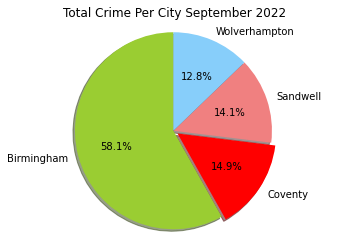

In [269]:
plt.title("Total Crime Per City September 2022")

no_crimes = [14107, 3619, 3431, 3107]

plt.pie(no_crimes, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

SB=no_crimes[0]
SC=no_crimes[1]
SS=no_crimes[2]
SW=no_crimes[3]

In [318]:
crime_data_to_load2 = "2022-02-west-midlands-street.csv"
crime_data2 = pd.read_csv(crime_data_to_load2)
crime_data2

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,39a636757dc35f1f582a0a2db4b9e2bf213bc8e9c14103...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Public order,Unable to prosecute suspect,NaN
1,b3279305e91cfa6a780ec08dc4fc0719f184356d908767...,2022-02,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified,NaN
2,271dfdd024fc4cce247b592736abac733639c880d5030a...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN
3,051261767b452c7b48cd5a722ab33d5f6967a017cf637e...,2022-02,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN
4,f3af5167aeff2c10c23b8c113801767037c05149e95862...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29792,ebc9e3f0c752ce9839f4cf1b255d34b4b4556974e7e1af...,2022-02,West Midlands Police,West Midlands Police,-2.119642,52.580480,On or near Sutherland Place,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect,NaN
29793,4d038eb222e49308d42f3ffbffb5069bae748b7d43af95...,2022-02,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect,NaN
29794,b55d94bd9d49da712b1bc7bd8dfa4ef5ab472426874d9d...,2022-02,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect,NaN
29795,738ec57f6c7f5f66d30fdecbc350c1e8f09f53aa1e89e9...,2022-02,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect,NaN


In [319]:
crime_data2.isna().sum()


Crime ID                  1668
Month                        0
Reported by                  0
Falls within                 0
Longitude                    0
Latitude                     0
Location                     0
LSOA code                    0
LSOA name                    0
Crime type                   0
Last outcome category     1668
Context                  29797
dtype: int64

In [320]:
crime_data2.drop("Context",inplace=True,axis=1)
crime_data2


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,39a636757dc35f1f582a0a2db4b9e2bf213bc8e9c14103...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Public order,Unable to prosecute suspect
1,b3279305e91cfa6a780ec08dc4fc0719f184356d908767...,2022-02,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Vehicle crime,Investigation complete; no suspect identified
2,271dfdd024fc4cce247b592736abac733639c880d5030a...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
3,051261767b452c7b48cd5a722ab33d5f6967a017cf637e...,2022-02,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
4,f3af5167aeff2c10c23b8c113801767037c05149e95862...,2022-02,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...,...
29792,ebc9e3f0c752ce9839f4cf1b255d34b4b4556974e7e1af...,2022-02,West Midlands Police,West Midlands Police,-2.119642,52.580480,On or near Sutherland Place,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29793,4d038eb222e49308d42f3ffbffb5069bae748b7d43af95...,2022-02,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29794,b55d94bd9d49da712b1bc7bd8dfa4ef5ab472426874d9d...,2022-02,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
29795,738ec57f6c7f5f66d30fdecbc350c1e8f09f53aa1e89e9...,2022-02,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect


In [321]:
crime_data2 = crime_data2.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_data2 = crime_data2[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code","Last outcome category", "Crime ID"]]
new_crime_data2 = new_crime_data2.set_index("City Name")
new_crime_data2.head()

,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,Crime ID
City Name,,,,,,,,,,
Birmingham,2022-02,Public order,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Unable to prosecute suspect,39a636757dc35f1f582a0a2db4b9e2bf213bc8e9c14103...
Birmingham,2022-02,Vehicle crime,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Investigation complete; no suspect identified,b3279305e91cfa6a780ec08dc4fc0719f184356d908767...
Birmingham,2022-02,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Unable to prosecute suspect,271dfdd024fc4cce247b592736abac733639c880d5030a...
Birmingham,2022-02,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Unable to prosecute suspect,051261767b452c7b48cd5a722ab33d5f6967a017cf637e...
Birmingham,2022-02,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Unable to prosecute suspect,f3af5167aeff2c10c23b8c113801767037c05149e95862...


In [457]:
crime_count2 = new_crime_data2["Crime type"].value_counts()
print(crime_count2)

Violence and sexual offences    13179
Vehicle crime                    2671
Public order                     2466
Criminal damage and arson        2221
Other theft                      1875
Anti-social behaviour            1668
Burglary                         1603
Shoplifting                      1270
Drugs                             640
Robbery                           621
Other crime                       544
Possession of weapons             504
Theft from the person             366
Bicycle theft                     169
Name: Crime type, dtype: int64


In [329]:
TT=new_crime_data2.loc[(new_crime_data2["Crime type"])&(new_crime_data2["City Name"]=="Birmingham"]).value_counts()
                                                        
                                                        
#PublicOrderBirJan=new_crime_data2.loc[(new_crime_data2["Crime type"])&(new_crime_data2["City Name"]=="Birmingham")].value_counts()

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (301690921.py, line 1)

In [326]:


city_count2 = crime_data2["City Name"].value_counts()
city_count2

Birmingham                12995
Sandwell                   3369
Coventry                   3362
Wolverhampton              2904
Walsall                    2805
Dudley                     2681
Solihull                   1668
Nuneaton and Bedworth         3
Bromsgrove                    2
Lichfield                     2
North Warwickshire            2
Bromsgrove                    1
North Warwickshire            1
Rugby                         1
South Staffordshire           1
Name: City Name, dtype: int64

In [ ]:
crime_data2["City Name"].value_counts()

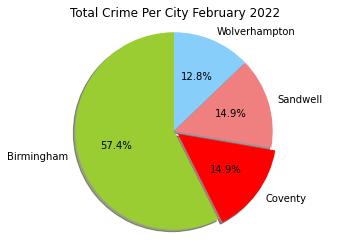

In [271]:

plt.title("Total Crime Per City February 2022")

no_crimes = [12995, 3369, 3362, 2904]

plt.pie(no_crimes, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

FB=no_crimes[0]
FC=no_crimes[1]
FS=no_crimes[2]
FW=no_crimes[3]


In [262]:
BirminghamT=JB+FB+MB+AB+MaB+JunB+JulB+AugB+SB
BirminghamT 

116955

In [263]:
CoventryT=JC+FC+MC+AC+MaC+JunC+JulC+AugC+SC
CoventryT

30321

In [264]:
SandwellT=JS+FS+MS+AS+MaS+JunS+JulS+AugS+SS
SandwellT

30258

In [265]:
WolverhamtonT=JW+FW+MW+AW+MaW+JunW+JulW+AugW+SW
WolverhamtonT

26136

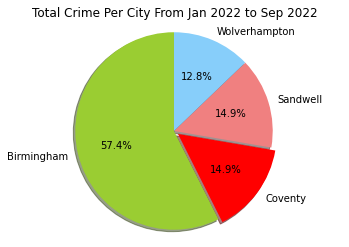

In [275]:

plt.title("Total Crime Per City From Jan 2022 to Sep 2022")

no_crimes = [116955, 30321, 30258, 26136]

plt.pie(no_crimes, explode=explode, labels=cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()




In [202]:
crimeC_dataJan = crime_dataJan.rename(columns= {
                                                "LSOA name":"City Name"})
new_crimeC_dataJan = crime_dataJan[["City Name", "Month", "Crime type",]]
#new_crime_data = new_crime_data.set_index("City Name")
new_crimeC_dataJan.head()

,City Name,Month,Crime type
0,Birmingham,2022-01,Anti-social behaviour
1,Birmingham,2022-01,Anti-social behaviour
2,Birmingham,2022-01,Violence and sexual offences
3,Birmingham,2022-01,Violence and sexual offences
4,Birmingham,2022-01,Violence and sexual offences


In [213]:
Thecrimes=new_crimeC_dataJan.groupby(["Crime type"])["City Name"].value_counts()
Thecrimes


Crime type                    City Name            
Anti-social behaviour         Birmingham                688
                              Sandwell                  193
                              Coventry                  189
                              Dudley                    186
                              Walsall                   182
                                                       ... 
Violence and sexual offences  Walsall                  1206
                              Solihull                  713
                              Nuneaton and Bedworth       4
                              Rugby                       4
                              South Staffordshire         1
Name: City Name, Length: 108, dtype: int64

In [215]:
#AAA = new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime Type"]=="Anti-social behaviour")]
#covSep = new_crime_dataSep.loc[(new_crime_dataSep["City Name"]=="Coventry")]
#SandSep = new_crime_dataSep.loc[(new_crime_dataSep["City Name"]=="Sandwell")]
#whamSep = new_crime_dataSep.loc[(new_crime_dataSep["City Name"]=="Wolverhampton")]

In [216]:
ThecrimesA=new_crimeC_dataJan.groupby(["City Name"])["Crime type"].value_counts()
ThecrimesA


City Name      Crime type                  
Birmingham     Violence and sexual offences    6177
               Vehicle crime                   1259
               Public order                    1048
               Criminal damage and arson        978
               Burglary                         912
                                               ... 
Wolverhampton  Other crime                       48
               Possession of weapons             43
               Robbery                           38
               Theft from the person             20
               Bicycle theft                     15
Name: Crime type, Length: 108, dtype: int64

In [277]:
Sex =new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Violence and sexual offences")&(new_crimeC_dataJan["City Name"]=="Birmingham")]

In [224]:
Sex

,City Name,Month,Crime type
2,Birmingham,2022-01,Violence and sexual offences
3,Birmingham,2022-01,Violence and sexual offences
4,Birmingham,2022-01,Violence and sexual offences
5,Birmingham,2022-01,Violence and sexual offences
7,Birmingham,2022-01,Violence and sexual offences
...,...,...,...
13786,Birmingham,2022-01,Violence and sexual offences
13787,Birmingham,2022-01,Violence and sexual offences
13788,Birmingham,2022-01,Violence and sexual offences
13789,Birmingham,2022-01,Violence and sexual offences


In [225]:
ViolentCrime=Sex.value_counts()

In [226]:
ViolentCrime

City Name   Month    Crime type                  
Birmingham  2022-01  Violence and sexual offences    6177
dtype: int64

In [280]:
Car =new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Vehicle crime")&(new_crimeC_dataJan["City Name"]=="Birmingham")]

In [283]:
Car

,City Name,Month,Crime type
6,Birmingham,2022-01,Vehicle crime
15,Birmingham,2022-01,Vehicle crime
20,Birmingham,2022-01,Vehicle crime
40,Birmingham,2022-01,Vehicle crime
41,Birmingham,2022-01,Vehicle crime
...,...,...,...
13754,Birmingham,2022-01,Vehicle crime
13755,Birmingham,2022-01,Vehicle crime
13776,Birmingham,2022-01,Vehicle crime
13777,Birmingham,2022-01,Vehicle crime


In [285]:
CarCrimeBirJan=Car.value_counts()
TheCar

City Name   Month    Crime type   
Birmingham  2022-01  Vehicle crime    1259
dtype: int64

In [295]:
PublicOrderBirJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Public order")&(new_crimeC_dataJan["City Name"]=="Birmingham")].value_counts()
#PubOrserBirJan
PublicOrderBirJan


City Name   Month    Crime type  
Birmingham  2022-01  Public order    1048
dtype: int64

In [297]:
T=PublicOrderBirJan.value_counts()
T

1048    1
dtype: int64

In [ ]:
Criminal damage and arson

In [299]:
CriminalDandA

City Name   Month    Crime type               
Birmingham  2022-01  Criminal damage and arson    978
dtype: int64

In [306]:
BurglaryBirJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Burglary")&(new_crimeC_dataJan["City Name"]=="Birmingham")].value_counts()
BurglaryBirJan

City Name   Month    Crime type
Birmingham  2022-01  Burglary      912
dtype: int64

In [420]:
PossWeapBirJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Possession of weapons")&(new_crimeC_dataJan["City Name"]=="Birmingham")].value_counts()
PossWeapBirJan

City Name   Month    Crime type           
Birmingham  2022-01  Possession of weapons    257
dtype: int64

In [ ]:
Robbery

In [415]:
 AntiSoBirJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Anti-social behaviour")&(new_crimeC_dataJan["City Name"]=="Birmingham")].value_counts()
AntiSoBirJan

City Name   Month    Crime type           
Birmingham  2022-01  Anti-social behaviour    688
dtype: int64

In [423]:
RJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Robbery")&(new_crimeC_dataJan["City Name"])].value_counts()
RJan


City Name      Month    Crime type
Birmingham     2022-01  Robbery       319
Coventry       2022-01  Robbery        77
Sandwell       2022-01  Robbery        75
Walsall        2022-01  Robbery        42
Dudley         2022-01  Robbery        40
Wolverhampton  2022-01  Robbery        38
Solihull       2022-01  Robbery        37
dtype: int64

In [422]:
#Other theft
OTJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Other theft")&(new_crimeC_dataJan["City Name"])].value_counts()
OTJan
                             

City Name      Month    Crime type
Birmingham     2022-01  Robbery       319
Coventry       2022-01  Robbery        77
Sandwell       2022-01  Robbery        75
Walsall        2022-01  Robbery        42
Dudley         2022-01  Robbery        40
Wolverhampton  2022-01  Robbery        38
Solihull       2022-01  Robbery        37
dtype: int64

In [309]:
crime_dataJan

City Name   Month    Crime type           
Birmingham  2022-01  Theft from the person    224
dtype: int64

In [339]:
TheftPersonBirJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Theft from the person")&(new_crimeC_dataJan["City Name"])].value_counts()

TheftPersonBirJan

City Name      Month    Crime type           
Birmingham     2022-01  Theft from the person    224
Coventry       2022-01  Theft from the person     56
Walsall        2022-01  Theft from the person     24
Dudley         2022-01  Theft from the person     21
Wolverhampton  2022-01  Theft from the person     20
Sandwell       2022-01  Theft from the person     18
Solihull       2022-01  Theft from the person     10
dtype: int64

In [1]:
Robbery
RJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Robbery")&(new_crimeC_dataJan["City Name"])].value_counts()
RJan

NameError: name 'Robbery' is not defined

crime_dataMar


In [ ]:
#crime_dataJan

VCJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Vehicle crime")&(new_crimeC_dataJan["City Name"])].value_counts()
VCJan

City Name              Month    Crime type   
Birmingham             2022-01  Vehicle crime    1259
Sandwell               2022-01  Vehicle crime     363
Coventry               2022-01  Vehicle crime     351
Walsall                2022-01  Vehicle crime     336
Dudley                 2022-01  Vehicle crime     290
Wolverhampton          2022-01  Vehicle crime     261
Solihull               2022-01  Vehicle crime     188
Nuneaton and Bedworth  2022-01  Vehicle crime       3
dtype: int64

In [ ]:
ASBJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Anti-social behaviour")&(new_crimeC_dataJan["City Name"])].value_counts()
ASBJan

City Name      Month    Crime type           
Birmingham     2022-01  Anti-social behaviour    688
Sandwell       2022-01  Anti-social behaviour    193
Coventry       2022-01  Anti-social behaviour    189
Dudley         2022-01  Anti-social behaviour    186
Walsall        2022-01  Anti-social behaviour    182
Wolverhampton  2022-01  Anti-social behaviour    126
Solihull       2022-01  Anti-social behaviour     92
dtype: int64

In [ ]:
POJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Public order")&(new_crimeC_dataJan["City Name"])].value_counts()
POJan

City Name      Month    Crime type  
Birmingham     2022-01  Public order    1048
Sandwell       2022-01  Public order     266
Dudley         2022-01  Public order     259
Wolverhampton  2022-01  Public order     238
Coventry       2022-01  Public order     229
Walsall        2022-01  Public order     224
Solihull       2022-01  Public order     157
Lichfield      2022-01  Public order       1
dtype: int64

In [ ]:
 VSOJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Violence and sexual offences")&(new_crimeC_dataJan["City Name"])].value_counts()
VSOJan

City Name              Month    Crime type                  
Birmingham             2022-01  Violence and sexual offences    6177
Sandwell               2022-01  Violence and sexual offences    1528
Coventry               2022-01  Violence and sexual offences    1503
Wolverhampton          2022-01  Violence and sexual offences    1417
Dudley                 2022-01  Violence and sexual offences    1214
Walsall                2022-01  Violence and sexual offences    1206
Solihull               2022-01  Violence and sexual offences     713
Nuneaton and Bedworth  2022-01  Violence and sexual offences       4
Rugby                  2022-01  Violence and sexual offences       4
South Staffordshire    2022-01  Violence and sexual offences       1
dtype: int64

In [ ]:
 VSOJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Burglary")&(new_crimeC_dataJan["City Name"])].value_counts()
VSOJan

City Name             Month    Crime type
Birmingham            2022-01  Burglary      912
Sandwell              2022-01  Burglary      206
Dudley                2022-01  Burglary      191
Wolverhampton         2022-01  Burglary      187
Coventry              2022-01  Burglary      178
Walsall               2022-01  Burglary      170
Solihull              2022-01  Burglary      109
Bromsgrove            2022-01  Burglary        3
South Staffordshire   2022-01  Burglary        1
dtype: int64

In [ ]:

PWJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Possession of weapons")&(new_crimeC_dataJan["City Name"])].value_counts()
PWJan

City Name      Month    Crime type           
Birmingham     2022-01  Possession of weapons    257
Coventry       2022-01  Possession of weapons     60
Sandwell       2022-01  Possession of weapons     47
Dudley         2022-01  Possession of weapons     43
Walsall        2022-01  Possession of weapons     43
Wolverhampton  2022-01  Possession of weapons     43
Solihull       2022-01  Possession of weapons     25
dtype: int64

In [ ]:
BTJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Bicycle theft")&(new_crimeC_dataJan["City Name"])].value_counts()
BTJan

City Name      Month    Crime type   
Birmingham     2022-01  Bicycle theft    70
Coventry       2022-01  Bicycle theft    23
Wolverhampton  2022-01  Bicycle theft    15
Solihull       2022-01  Bicycle theft    12
Walsall        2022-01  Bicycle theft    12
Sandwell       2022-01  Bicycle theft     7
Dudley         2022-01  Bicycle theft     3
dtype: int64

In [ ]:
POJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Public order")&(new_crimeC_dataJan["City Name"])].value_counts()
POJan

City Name      Month    Crime type  
Birmingham     2022-01  Public order    1048
Sandwell       2022-01  Public order     266
Dudley         2022-01  Public order     259
Wolverhampton  2022-01  Public order     238
Coventry       2022-01  Public order     229
Walsall        2022-01  Public order     224
Solihull       2022-01  Public order     157
Lichfield      2022-01  Public order       1
dtype: int64

In [ ]:
CDAJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Criminal damage and arson")&(new_crimeC_dataJan["City Name"])].value_counts()
CDAJan

City Name            Month    Crime type               
Birmingham           2022-01  Criminal damage and arson    978
Walsall              2022-01  Criminal damage and arson    275
Sandwell             2022-01  Criminal damage and arson    273
Coventry             2022-01  Criminal damage and arson    266
Wolverhampton        2022-01  Criminal damage and arson    250
Dudley               2022-01  Criminal damage and arson    244
Solihull             2022-01  Criminal damage and arson    104
North Warwickshire   2022-01  Criminal damage and arson      1
South Staffordshire  2022-01  Criminal damage and arson      1
dtype: int64

In [ ]:
OCJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Other crime")&(new_crimeC_dataJan["City Name"])].value_counts()
OCJan

City Name      Month    Crime type 
Birmingham     2022-01  Other crime    199
Sandwell       2022-01  Other crime     65
Coventry       2022-01  Other crime     53
Dudley         2022-01  Other crime     49
Walsall        2022-01  Other crime     48
Wolverhampton  2022-01  Other crime     48
Solihull       2022-01  Other crime     33
dtype: int64

In [ ]:
CNJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Drugs")&(new_crimeC_dataJan["City Name"])].value_counts()
CNJan

City Name      Month    Crime type
Birmingham     2022-01  Drugs         308
Coventry       2022-01  Drugs          79
Sandwell       2022-01  Drugs          75
Wolverhampton  2022-01  Drugs          63
Walsall        2022-01  Drugs          55
Dudley         2022-01  Drugs          46
Solihull       2022-01  Drugs          42
dtype: int64

In [ ]:
SLJan=new_crimeC_dataJan.loc[(new_crimeC_dataJan["Crime type"]=="Shoplifting")&(new_crimeC_dataJan["City Name"])].value_counts()
SLJan

City Name      Month    Crime type 
Birmingham     2022-01  Shoplifting    521
Coventry       2022-01  Shoplifting    175
Dudley         2022-01  Shoplifting    151
Walsall        2022-01  Shoplifting    139
Sandwell       2022-01  Shoplifting    116
Wolverhampton  2022-01  Shoplifting    115
Solihull       2022-01  Shoplifting    104
dtype: int64

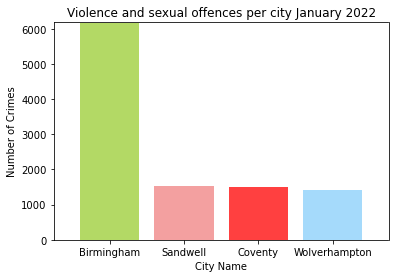

In [ ]:
plt.title("Violence and sexual offences per city in January 2022")

#City Name              Month    Crime type                  
#Birmingham             2022-01  Violence and sexual offences    6177
#Sandwell               2022-01  Violence and sexual offences    1528
#Coventry               2022-01  Violence and sexual offences    1503
#Wolverhampton          2022-01  Violence and sexual offences    1417

cities = ["Birmingham","Sandwell",  "Coventy","Wolverhampton",]
no_crimes = [6177, 1528, 1503, 1417]



theColor=["yellowgreen","lightcoral","red", "lightskyblue"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Violence and sexual offences per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

#colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]

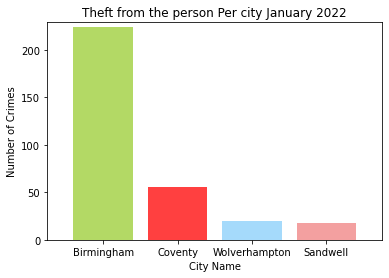

In [ ]:



#Birmingham     2022-01  Theft from the person    224
#Coventry       2022-01  Theft from the person     56
#Walsall        2022-01  Theft from the person     24
#Dudley         2022-01  Theft from the person     21
#Wolverhampton  2022-01  Theft from the person     20
#Sandwell       2022-01  Theft from the person     18
#Solihull       2022-01  Theft from the person     10


cities = ["Birmingham", "Coventy","Wolverhampton","Sandwell" ]
plt.title("Violence and sexual offences per city in January 2022")
no_crimes = [224, 56, 20, 18]

theColor=["yellowgreen", "red", "lightskyblue","lightcoral"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Theft from the person Per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

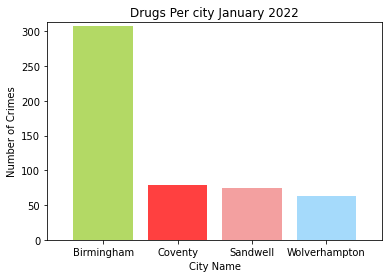

In [ ]:
#City Name      Month    Crime type
#Birmingham     2022-01  Drugs         308
#Coventry       2022-01  Drugs          79
#Sandwell       2022-01  Drugs          75
#Wolverhampton  2022-01  Drugs          63
#Walsall        2022-01  Drugs          55
    
cities = ["Birmingham", "Coventy","Sandwell","Wolverhampton"]    
no_crimes = [308, 79,75,63]

theColor=["yellowgreen", "red","lightcoral","lightskyblue" ]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Drugs Per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

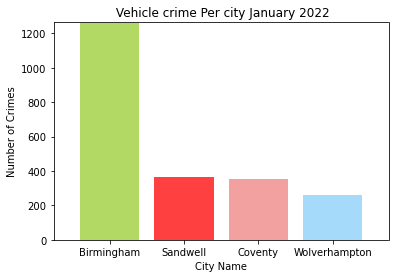

In [ ]:
#City Name              Month    Crime type   
#Birmingham             2022-01  Vehicle crime    1259
#Sandwell               2022-01  Vehicle crime     363
#Coventry               2022-01  Vehicle crime     351
#Wolverhampton          2022-01  Vehicle crime     261

cities=["Birmingham","Sandwell", "Coventy","Wolverhampton" ]
no_crimes = [1259, 363, 351, 261]

theColor=["yellowgreen","red","lightcoral", "lightskyblue"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title(" Vehicle crime Per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

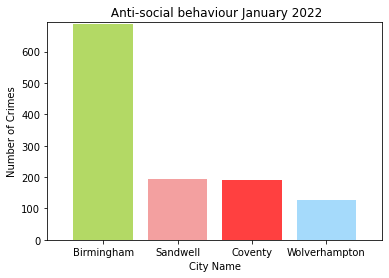

In [ ]:
#City Name      Month    Crime type           
#Birmingham     2022-01  Anti-social behaviour    688
#Sandwell       2022-01  Anti-social behaviour    193
#Coventry       2022-01  Anti-social behaviour    189
#Dudley         2022-01  Anti-social behaviour    186
#Walsall        2022-01  Anti-social behaviour    182
#Wolverhampton  2022-01  Anti-social behaviour    126


cities=["Birmingham","Sandwell", "Coventy","Wolverhampton" ]
no_crimes = [688, 193, 189, 126]

theColor=["yellowgreen","lightcoral","red", "lightskyblue"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title(" Anti-social behaviour January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

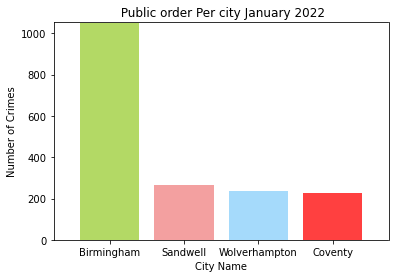

In [ ]:
#City Name      Month    Crime type  
#Birmingham     2022-01  Public order    1048
#Sandwell       2022-01  Public order     266
#Dudley         2022-01  Public order     259
#Wolverhampton  2022-01  Public order     238
#Coventry       2022-01  Public order     229


theColor=["yellowgreen","lightcoral", "lightskyblue","red"]

no_crimes = [1048, 266, 238, 229]

cities=["Birmingham","Sandwell","Wolverhampton", "Coventy" ]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title(" Public order Per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

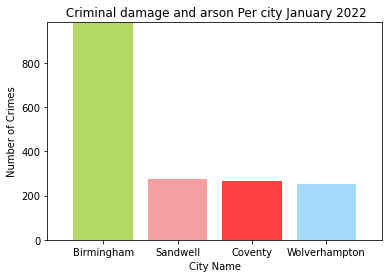

In [ ]:
#Birmingham           2022-01  Criminal damage and arson    978
#Walsall              2022-01  Criminal damage and arson    275
#Sandwell             2022-01  Criminal damage and arson    273
#Coventry             2022-01  Criminal damage and arson    266
#Wolverhampton        2022-01  Criminal damage and arson    250


cities=["Birmingham","Sandwell","Coventy","Wolverhampton"]
no_crimes = [978,273, 266, 250]

theColor=["yellowgreen","lightcoral","red", "lightskyblue"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title(" Criminal damage and arson Per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()



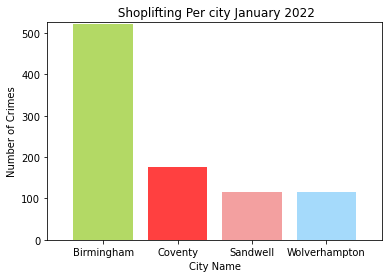

In [ ]:
#City Name      Month    Crime type 
#Birmingham     2022-01  Shoplifting    521
#Coventry       2022-01  Shoplifting    175
#Sandwell       2022-01  Shoplifting    116
#Wolverhampton  2022-01  Shoplifting    115

cities=["Birmingham","Coventy","Sandwell","Wolverhampton"]
no_crimes = [521,175, 116, 115]

theColor=["yellowgreen","red","lightcoral","lightskyblue"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title(" Shoplifting Per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

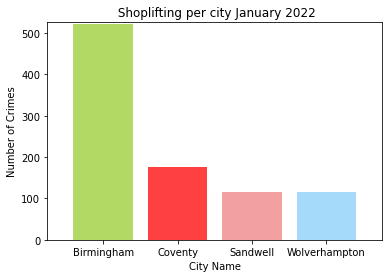

In [ ]:
#City Name      Month    Crime type 
#Birmingham     2022-01  Shoplifting    521
#Coventry       2022-01  Shoplifting    175
#Sandwell       2022-01  Shoplifting    116
#Wolverhampton  2022-01  Shoplifting    115

cities=["Birmingham","Coventy","Sandwell","Wolverhampton"]
no_crimes = [521,175, 116, 115]

theColor=["yellowgreen","red","lightcoral","lightskyblue"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title(" Shoplifting per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

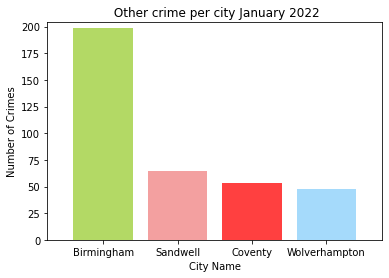

In [ ]:
#City Name      Month    Crime type 
#Birmingham     2022-01  Other crime    199
#Sandwell       2022-01  Other crime     65
#Coventry       2022-01  Other crime     53
#Wolverhampton  2022-01  Other crime     48


cities=["Birmingham","Sandwell","Coventy","Wolverhampton"]
no_crimes = [199,65, 53, 48]

theColor=["yellowgreen","lightcoral","red","lightskyblue"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title(" Other crime per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

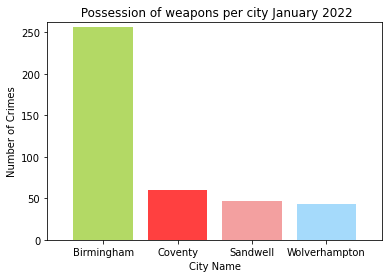

In [ ]:
#City Name      Month    Crime type           
#Birmingham     2022-01  Possession of weapons    257
#Coventry       2022-01  Possession of weapons     60
#Sandwell       2022-01  Possession of weapons     47
#Wolverhampton  2022-01  Possession of weapons     43

cities=["Birmingham","Coventy","Sandwell","Wolverhampton"]
no_crimes = [257,60, 47, 43]

theColor=["yellowgreen","red","lightcoral","lightskyblue"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title(" Possession of weapons per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

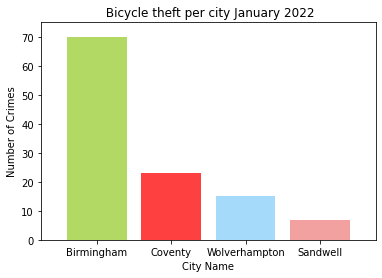

In [ ]:
#City Name      Month    Crime type   
#Birmingham     2022-01  Bicycle theft    70
#Coventry       2022-01  Bicycle theft    23
#Wolverhampton  2022-01  Bicycle theft    15
#Sandwell       2022-01  Bicycle theft     7

cities=["Birmingham","Coventy","Wolverhampton","Sandwell",]
no_crimes = [70,23, 15, 7]

theColor=["yellowgreen","red","lightskyblue","lightcoral"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title(" Bicycle theft per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

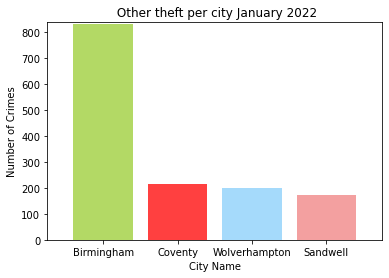

In [ ]:
#City Name           Month    Crime type 
#Birmingham          2022-01  Other theft    831
#Coventry            2022-01  Other theft    214
#Sandwell            2022-01  Other theft    201
#Wolverhampton       2022-01  Other theft    173
cities=["Birmingham","Coventy","Wolverhampton","Sandwell",]
no_crimes = [831,214, 201, 173]

theColor=["yellowgreen","red","lightskyblue","lightcoral"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title(" Other theft per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()

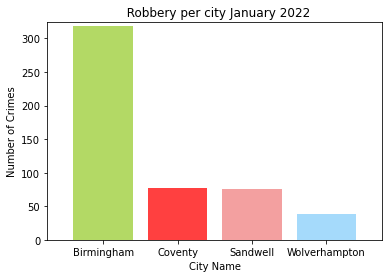

In [ ]:
#Birmingham     2022-01  Robbery       319
#Coventry       2022-01  Robbery        77
#Sandwell       2022-01  Robbery        75
#Wolverhampton  2022-01  Robbery        38


cities=["Birmingham","Coventy","Sandwell","Wolverhampton"]
no_crimes = [319,77, 75, 38]

theColor=["yellowgreen","red","lightcoral","lightskyblue"]

x_axis = np.arange(0, len(cities))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("  Robbery per city January 2022")
plt.xlabel("City Name")
plt.ylabel("Number of Crimes")

plt.xlim(-0.75, len(cities)-.25)
plt.ylim(0, max(no_crimes) + 5)

plt.bar(x_axis, no_crimes, color=theColor, alpha=0.75, align="center")

plt.xticks(tick_locations, cities)
plt.show()